In [1]:
import numpy as np
import torch 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# Stokes vector for the input polarized light

'''
     z    |
          |
          |________ x
      y  /
'''


#theoretical pure twist result 
def director(x,z,lam):
     alpha  = (np.pi*(x%lam)/lam) # Bottom Layer boundary 
     beta = np.pi/2 # Top layer boundary
     P = 2      #   No of turns or pitch
     q0 = 2*np.pi/P
     return  alpha+ np.abs(beta-alpha)*z


#Lattice configuration
X_lim = lam = 60e-6
z_lim = 14e-6
# Calculate Mueller matrix for the jth particle

N = 32
wavelength = 0.545e-6
n0 = 1
nE = 1.5

# Flatten the lattice and create the mesh coordinate values
s_in = np.array([[1,0,0,0]],dtype="float")
s_in_d =  torch.tensor(s_in.T,device=device).expand(N,-1,-1)


X = np.linspace(0,2*lam,N)

M_arr = []
for x in X:
     M = np.identity(4)  
     for j in range(N):
          z = j/N
          theta = np.pi/2 # change wrt to the problem
          n_ej =  np.sqrt(n0**2 + (nE**2-n0**2)*np.cos(theta)**2)
          delta = 2*np.pi*2*z_lim /N*(1/wavelength)*n0*((nE/n_ej)-1)
          phi  = np.pi/2 - director(x,z,X_lim)
          a = np.sin(2*phi)**2+(np.cos(2*phi)**2)*np.cos(delta)
          b = -np.cos(2*phi)*np.sin(delta)
          c = np.sin(2*phi)*np.cos(2*phi)*(1-np.cos(delta))
          d = np.cos(delta)
          e = -np.sin(2*phi)*np.sin(delta)
          f = np.cos(2*phi)**2+(np.sin(2*phi)**2)*np.cos(delta)

          #print(a,b,c,d,e,f)
          arr = np.array([[1.0,0.0,0.0,0.0],
                    [0.0,a,b,c],
                    [0.0,-b,d,e],
                    [0.0,c,-e,f]])
          M = M @ arr
     M_arr.append(M)
M = torch.tensor(M_arr,device=device)
print(M)
# Polarizer 
P_in = 0.5*np.array([[1,0,0,1],
                     [0,0,0,0],
                     [0,0,0,0],
                     [1,0,0,1]])
P_in_d =  torch.tensor(P_in,device=device).expand(M.size(0),-1,-1)  
# Analyzer 
P_out = 0.5*np.array([[1,0,0,-1],
                      [0,0,0,0],
                      [0,0,0,0],
                      [-1,0,0,1]])
P_out_d =  torch.tensor(P_out,device=device).expand(M.size(0),-1,-1)   


s_out_d = torch.matmul(torch.matmul(torch.matmul(P_out_d, M), P_in_d),s_in_d)

print(s_out_d.size())




cuda:0


/tmp/ipykernel_197125/3269430167.py:65: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  M = torch.tensor(M_arr,device=device)


tensor([[[ 1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.4733, -0.8808, -0.0117],
         [ 0.0000, -0.8709, -0.4699,  0.1440],
         [ 0.0000, -0.1324, -0.0579, -0.9895]],

        [[ 1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.4600, -0.8009,  0.3834],
         [ 0.0000, -0.8850, -0.4486,  0.1247],
         [ 0.0000,  0.0721, -0.3967, -0.9151]],

        [[ 1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.3685, -0.5923,  0.7165],
         [ 0.0000, -0.8967, -0.4299,  0.1057],
         [ 0.0000,  0.2454, -0.6814, -0.6895]],

        [[ 1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.2200, -0.2857,  0.9327],
         [ 0.0000, -0.9061, -0.4141,  0.0869],
         [ 0.0000,  0.3614, -0.8643, -0.3499]],

        [[ 1.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0433,  0.0712,  0.9965],
         [ 0.0000, -0.9135, -0.4011,  0.0684],
         [ 0.0000,  0.4046, -0.9133,  0.0477]],

        [[ 1.0000,  0.0000,  0.0000,  0.0000],
   

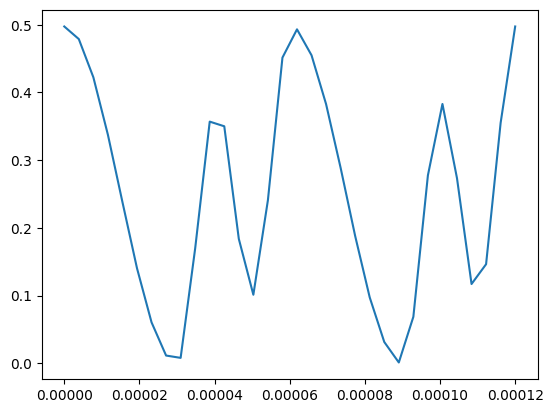

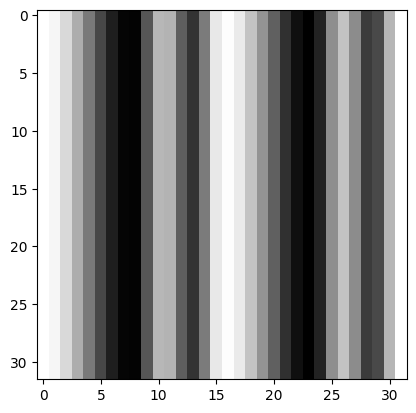

In [5]:
intensity_profile =  s_out_d[:,0,:].cpu()

intensity_image = intensity_profile.expand(-1,N).T


import matplotlib.pyplot as plt
plt.figure()
plt.plot(X,intensity_profile)

plt.figure()

plt.imshow(intensity_image, cmap = 'gray')

In [3]:
x  = np.linspace(0,3,4)

np.repeat([x],3,axis = 0)

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])